In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import spacy

In [12]:
elon = pd.read_csv('/content/Elon_musk (1).csv', encoding="ISO-8859-1")
elon.drop(columns='Unnamed: 0' , inplace=True)
elon 

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [13]:
elon['word_count'] = elon['Text'].apply(lambda x: len(str(x).split(' ')))
elon.head()

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17


In [14]:
elon['digits'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
elon.head()

,Text,word_count,digits
0,@kunalb11 Im an alien,4,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,0
2,@joerogan @Spotify Great interview!,4,0
3,@gtera27 Doge is underestimated,4,0
4,@teslacn Congratulations Tesla China for amazi...,17,0


In [15]:
elon.digits.value_counts()

0     1854
1      117
2       23
3        3
4        1
10       1
Name: digits, dtype: int64

In [16]:
elon['web_links'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('https://')]))
elon.head()

,Text,word_count,digits,web_links
0,@kunalb11 Im an alien,4,0,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,0,0
2,@joerogan @Spotify Great interview!,4,0,0
3,@gtera27 Doge is underestimated,4,0,0
4,@teslacn Congratulations Tesla China for amazi...,17,0,0


In [17]:
elon.web_links.value_counts()

0    1356
1     632
2      11
Name: web_links, dtype: int64

In [18]:
elon['hashtag'] = elon['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
elon.head()

,Text,word_count,digits,web_links,hashtag
0,@kunalb11 Im an alien,4,0,0,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13,0,0,0
2,@joerogan @Spotify Great interview!,4,0,0,0
3,@gtera27 Doge is underestimated,4,0,0,0
4,@teslacn Congratulations Tesla China for amazi...,17,0,0,0


In [19]:
elon.hashtag.value_counts()

0    1990
1       5
2       3
4       1
Name: hashtag, dtype: int64

In [20]:
elon = [Text.strip() for Text in elon.Text] 
elon = [Text for Text in elon if Text] 
elon[0:5]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!']

In [21]:
elon_text = ' '.join(elon)
elon_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [22]:
import pandas as pd 
import numpy as np 
import seaborn as sns

import string 
import spacy 

from nltk.corpus import stopwords

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline 

import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup

In [23]:
headers = {'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',   
    
}

In [24]:
def get_soup(url):
    r = requests.get(url, headers=headers,  params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [25]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [26]:

for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/Airdopes-121v2-Bluetooth-Immersive-Assistsant/product-reviews/B08JQN8DGZ/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/999 [00:00<?, ?it/s]

In [27]:
# Save results to a dataframe.. 
data = pd.DataFrame(reviewlist)
data.to_csv('Amzon_boat.csv', index=False)
data

,Rating,Title,Review,Review_Date
0,3.0,A overall good product but seemingly incompete...,I have tried several earbuds in the <1500Rs pr...,Reviewed in India 🇮🇳 on 10 February 2023
1,4.0,It is pretty good,The boat airdopes really meet my expectations ...,Reviewed in India 🇮🇳 on 22 May 2023
2,4.0,Air buds,Nice one,Reviewed in India 🇮🇳 on 27 May 2023
3,4.0,Nice,Nice,Reviewed in India 🇮🇳 on 27 May 2023
4,4.0,Nice Product,Product is nice when replaced it. Item I got e...,Reviewed in India 🇮🇳 on 18 May 2023
...,...,...,...,...
4995,5.0,Its working as expected boat is always best,Like the finish and quality,1 November 2022
4996,5.0,Osama,Nice products I'm so happy thinx Flipkart,27 October 2022
4997,5.0,Boat quality is superb,Bass quality noice cancellation quality is superb,27 October 2022
4998,5.0,Spa,Spa,22 November 2022


In [28]:
Review_date=[0]

word_list = ['Reviewed', 'in', 'India', '🇮🇳' , 'on']
repl_wrd = ''

for i in range(0, len(data)):
    new_string = ' '.join([repl_wrd if idx in word_list else idx for idx in data.Review_Date[i].split()])
    Review_date.append(new_string)

data['Review_Date'] = Review_date[1:]

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        5000 non-null   object 
 2   Review       5000 non-null   object 
 3   Review_Date  5000 non-null   object 
dtypes: float64(1), object(3)
memory usage: 156.4+ KB


In [30]:
data.Rating.describe()

count    5000.000000
mean        3.569200
std         1.095012
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Rating, dtype: float64

In [31]:
data.Review.isna().sum()

0

In [32]:
#for those entries where data.Review is null, replace Review with Title
data['Review'] = data['Review'].fillna(data['Title'])


#Stripping white spaces in Review_date
review_date = [0]

for i in range(0, len(data)):
    a= data.Review_Date[i].strip()
    review_date.append(a)

    
data['Review_Date']= review_date[1:]

In [33]:
data ['word_count'] = data ['Review'].apply(lambda x: len(str(x).split(' ')))
data[['Rating', 'Review', 'word_count']] .head()

,Rating,Review,word_count
0,3.0,I have tried several earbuds in the <1500Rs pr...,737
1,4.0,The boat airdopes really meet my expectations ...,16
2,4.0,Nice one,2
3,4.0,Nice,1
4,4.0,Product is nice when replaced it. Item I got e...,31


In [34]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
stop = stopwords.words('english')
data['stopword_count']=data.Review.apply(lambda x: len([x for x in x.split() if x in stop])) 
data[['Rating', 'Review', 'word_count', 'stopword_count']].head()

,Rating,Review,word_count,stopword_count
0,3.0,I have tried several earbuds in the <1500Rs pr...,737,328
1,4.0,The boat airdopes really meet my expectations ...,16,5
2,4.0,Nice one,2,0
3,4.0,Nice,1,0
4,4.0,Product is nice when replaced it. Item I got e...,31,10


In [36]:
data['digits'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits']].head()

,Rating,Review,word_count,stopword_count,digits
0,3.0,I have tried several earbuds in the <1500Rs pr...,737,328,3
1,4.0,The boat airdopes really meet my expectations ...,16,5,0
2,4.0,Nice one,2,0,0
3,4.0,Nice,1,0,0
4,4.0,Product is nice when replaced it. Item I got e...,31,10,0


In [37]:
data['web_links'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('https://')]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits', 'web_links']].head()

,Rating,Review,word_count,stopword_count,digits,web_links
0,3.0,I have tried several earbuds in the <1500Rs pr...,737,328,3,0
1,4.0,The boat airdopes really meet my expectations ...,16,5,0,0
2,4.0,Nice one,2,0,0,0
3,4.0,Nice,1,0,0,0
4,4.0,Product is nice when replaced it. Item I got e...,31,10,0,0


In [38]:
data.web_links.value_counts()

0    5000
Name: web_links, dtype: int64

In [39]:
data['hashtag'] = data['Review'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data[['Rating', 'Review', 'word_count', 'stopword_count', 'digits', 'web_links', 'hashtag']].head()

,Rating,Review,word_count,stopword_count,digits,web_links,hashtag
0,3.0,I have tried several earbuds in the <1500Rs pr...,737,328,3,0,0
1,4.0,The boat airdopes really meet my expectations ...,16,5,0,0,0
2,4.0,Nice one,2,0,0,0,0
3,4.0,Nice,1,0,0,0,0
4,4.0,Product is nice when replaced it. Item I got e...,31,10,0,0,0


In [40]:
data.hashtag.value_counts()

0    4998
1       2
Name: hashtag, dtype: int64

In [41]:
data['date'] = data['Review_Date'].str.split(' ').str[0] 
data['Month'] = data['Review_Date'].str.split(' ').str[1] 
data['Year'] = data['Review_Date'].str.split(' ').str[2] 
data[['Review_Date', 'date', 'Month', 'Year']]

,Review_Date,date,Month,Year
0,10 February 2023,10,February,2023
1,22 May 2023,22,May,2023
2,27 May 2023,27,May,2023
3,27 May 2023,27,May,2023
4,18 May 2023,18,May,2023
...,...,...,...,...
4995,1 November 2022,1,November,2022
4996,27 October 2022,27,October,2022
4997,27 October 2022,27,October,2022
4998,22 November 2022,22,November,2022


In [42]:
data1 = data[['Rating','Title','Review', 'date', 'Month', 'Year']]
data1

,Rating,Title,Review,date,Month,Year
0,3.0,A overall good product but seemingly incompete...,I have tried several earbuds in the <1500Rs pr...,10,February,2023
1,4.0,It is pretty good,The boat airdopes really meet my expectations ...,22,May,2023
2,4.0,Air buds,Nice one,27,May,2023
3,4.0,Nice,Nice,27,May,2023
4,4.0,Nice Product,Product is nice when replaced it. Item I got e...,18,May,2023
...,...,...,...,...,...,...
4995,5.0,Its working as expected boat is always best,Like the finish and quality,1,November,2022
4996,5.0,Osama,Nice products I'm so happy thinx Flipkart,27,October,2022
4997,5.0,Boat quality is superb,Bass quality noice cancellation quality is superb,27,October,2022
4998,5.0,Spa,Spa,22,November,2022


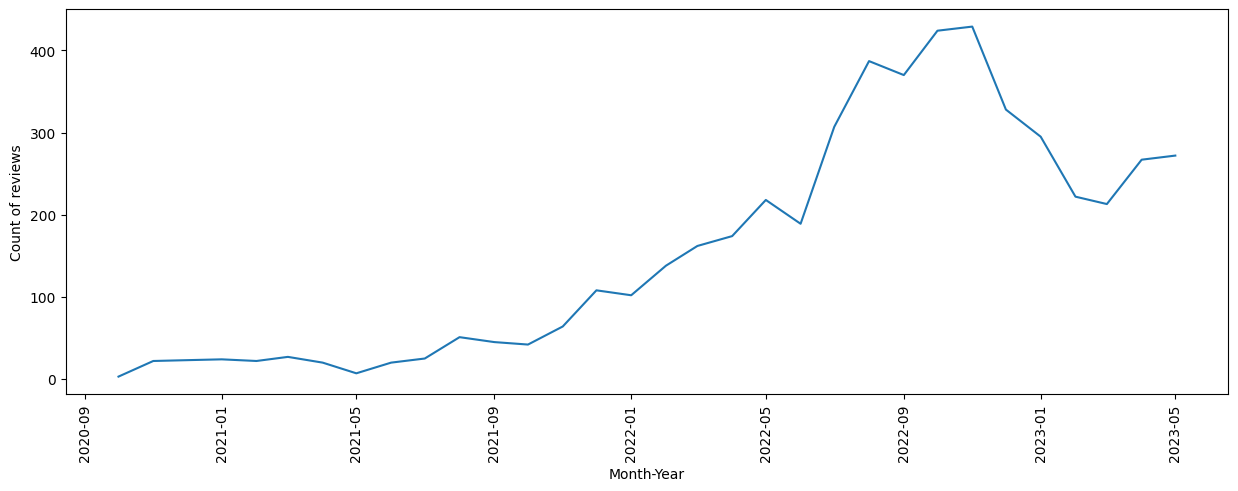

In [43]:
data['Mo_Year'] = data['Month'] + ' ' + data['Year'] 
a = pd.DataFrame(data['Mo_Year'].value_counts() ) 
a = a.reset_index(level=0)

a['index'] = pd.to_datetime(a['index'])
a.sort_values(by='index').reset_index(drop=True) 

a = a.rename(columns={'index':'month_year', 'Mo_Year': 'review_count'}) 
plt.figure(figsize=(15,5))
sns.lineplot(x=a.month_year, y=a.review_count)
plt.xlabel('Month-Year')
plt.ylabel('Count of reviews')
plt.xticks(rotation = 90 )
plt.show() 

In [44]:
data2 = data1[['Review']] 
data2

,Review
0,I have tried several earbuds in the <1500Rs pr...
1,The boat airdopes really meet my expectations ...
2,Nice one
3,Nice
4,Product is nice when replaced it. Item I got e...
...,...
4995,Like the finish and quality
4996,Nice products I'm so happy thinx Flipkart
4997,Bass quality noice cancellation quality is superb
4998,Spa


In [45]:
import re 
corpus = []



for i in range(0, len(data2)):
    #review = re.sub('@[^\s]+' , '' , data2.Review[i]) #remove userid
    #review = re.sub(r'http\S+' , '', review ) #remove URL
    
    review = re.sub(r'[^\w\s]', '', data2.Review[i]) #remove punctuation
    review = review.lower() #normalise
    review = re.sub(r'\d', '', review) #remove digits
    
    corpus.append(review)

In [46]:
corpus

['i have tried several earbuds in the rs price segment and without a doubt it is a good earbud for the price you pay but it has its own set of pros and cons so without further ado the pros and the cons of the product according to me are  marked points are important featuresdownsides of this earphonepros sound and bass the sound and bass of this earbud are exceptionally good for the price the sound and the bass can even be tuned by an eq to suit your audio needs from your phone but in windows i still havent found a way to change eq without using some third party software waterproof yes it is water proof but up to a certain water level and for a certain duration design this point is debatable for this earbud because of its large upper part though it sits comfortably in your ear but it has a tendency to come loose due to certain jerking of the head battery backup of each earbud by far the best thing for this earbud the battery backup is impressive even after using it for hrs at  volume th

In [47]:
data2['clean_reviews'] = corpus 
data2

,Review,clean_reviews
0,I have tried several earbuds in the <1500Rs pr...,i have tried several earbuds in the rs price s...
1,The boat airdopes really meet my expectations ...,the boat airdopes really meet my expectations ...
2,Nice one,nice one
3,Nice,nice
4,Product is nice when replaced it. Item I got e...,product is nice when replaced it item i got ea...
...,...,...
4995,Like the finish and quality,like the finish and quality
4996,Nice products I'm so happy thinx Flipkart,nice products im so happy thinx flipkart
4997,Bass quality noice cancellation quality is superb,bass quality noice cancellation quality is superb
4998,Spa,spa


In [48]:
from nltk.corpus import stopwords

my_stop_words=stopwords.words('english')
user_stop_words = []

my_stop_words.extend(user_stop_words)

stopwords_set = set(my_stop_words)
clean_reviews = []

for i in range (0, len(data2)):
    
    words_without_stopwords = [word for word in data2.clean_reviews[i].split() if not word in my_stop_words]
    
    clean_reviews.append(' '.join(words_without_stopwords))
    
data2['absolute_clean_reviews'] = clean_reviews
data2.head(10)

,Review,clean_reviews,absolute_clean_reviews
0,I have tried several earbuds in the <1500Rs pr...,i have tried several earbuds in the rs price s...,tried several earbuds rs price segment without...
1,The boat airdopes really meet my expectations ...,the boat airdopes really meet my expectations ...,boat airdopes really meet expectations great b...
2,Nice one,nice one,nice one
3,Nice,nice,nice
4,Product is nice when replaced it. Item I got e...,product is nice when replaced it item i got ea...,product nice replaced item got earlier echoing...
5,Provide competitive price to top brand products,provide competitive price to top brand products,provide competitive price top brand products
6,Loveit,loveit,loveit
7,Good product.,good product,good product
8,Good,good,good
9,Good quality,good quality,good quality


In [49]:
tokenized_review = data2['absolute_clean_reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [tried, several, earbuds, rs, price, segment, ...
1    [boat, airdopes, really, meet, expectations, g...
2                                          [nice, one]
3                                               [nice]
4    [product, nice, replaced, item, got, earlier, ...
5    [provide, competitive, price, top, brand, prod...
6                                             [loveit]
7                                      [good, product]
8                                               [good]
9                                      [good, quality]
Name: absolute_clean_reviews, dtype: object

In [50]:
import nltk
nltk.download('omw-1.4') 
nltk.download('wordnet')  

from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

word_lemmatizer = WordNetLemmatizer()

tokenized_review = tokenized_review.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])
tokenized_review.head(10)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


0    [tried, several, earbuds, r, price, segment, w...
1    [boat, airdopes, really, meet, expectation, gr...
2                                          [nice, one]
3                                               [nice]
4    [product, nice, replaced, item, got, earlier, ...
5    [provide, competitive, price, top, brand, prod...
6                                             [loveit]
7                                      [good, product]
8                                               [good]
9                                      [good, quality]
Name: absolute_clean_reviews, dtype: object

In [51]:
for i, tokens in enumerate(tokenized_review):
    tokenized_review[i] = ' '.join(tokens)

data2['absolute_clean_reviews'] = tokenized_review
data2.head(10)

,Review,clean_reviews,absolute_clean_reviews
0,I have tried several earbuds in the <1500Rs pr...,i have tried several earbuds in the rs price s...,tried several earbuds r price segment without ...
1,The boat airdopes really meet my expectations ...,the boat airdopes really meet my expectations ...,boat airdopes really meet expectation great bu...
2,Nice one,nice one,nice one
3,Nice,nice,nice
4,Product is nice when replaced it. Item I got e...,product is nice when replaced it item i got ea...,product nice replaced item got earlier echoing...
5,Provide competitive price to top brand products,provide competitive price to top brand products,provide competitive price top brand product
6,Loveit,loveit,loveit
7,Good product.,good product,good product
8,Good,good,good
9,Good quality,good quality,good quality


In [52]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(data2.absolute_clean_reviews)  
print(vectorizer.vocabulary_)

{'tried': 5956, 'several': 5232, 'earbuds': 1822, 'price': 4434, 'segment': 5181, 'without': 6403, 'doubt': 1750, 'good': 2444, 'earbud': 1820, 'pay': 4185, 'set': 5226, 'pro': 4463, 'con': 1277, 'ado': 95, 'product': 4495, 'according': 47, 'marked': 3480, 'point': 4338, 'important': 2832, 'featuresdownsides': 2179, 'earphonepros': 1852, 'sound': 5419, 'bass': 524, 'exceptionally': 2046, 'even': 2009, 'tuned': 5984, 'eq': 1982, 'suit': 5592, 'audio': 392, 'need': 3803, 'phone': 4258, 'window': 6390, 'still': 5524, 'havent': 2651, 'found': 2298, 'way': 6310, 'change': 1043, 'using': 6135, 'third': 5792, 'party': 4166, 'software': 5367, 'waterproof': 6303, 'yes': 6503, 'water': 6302, 'proof': 4569, 'certain': 1021, 'level': 3274, 'duration': 1804, 'design': 1565, 'debatable': 1496, 'large': 3229, 'upper': 6085, 'part': 4158, 'though': 5820, 'sits': 5311, 'comfortably': 1220, 'ear': 1815, 'tendency': 5714, 'come': 1211, 'loose': 3373, 'due': 1793, 'jerking': 3083, 'head': 2653, 'battery':

In [58]:
vectorizer = CountVectorizer(analyzer='word',ngram_range=(1,3), min_df=3) 
X = vectorizer.fit_transform(data2.absolute_clean_reviews).toarray()

count_df = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())
count_df

,aap,aati,aawaj,abhi,able,able charge,able connect,able hear,able hear anything,able hear clearly,...,यह,रह,लए,लकन,वल,सउड,सनन,सनन लए,समय,हत
0,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 5000)
X = vectorizer.fit_transform(data2.absolute_clean_reviews).toarray()

count_df_tf_idf = pd.DataFrame(X, columns=vectorizer.get_feature_names_out())
count_df_tf_idf

,aap,aati,aawaj,abhi,able,able charge,able connect,able hear,able hear anything,able hear clearly,...,वल,सउड,सकत,सथ,सनई,सनई दत,सनन,सनन लए,समय,हत
0,0.0,0.0,0.0,0.0,0.027842,0.042978,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
data2

,Review,clean_reviews,absolute_clean_reviews
0,I have tried several earbuds in the <1500Rs pr...,i have tried several earbuds in the rs price s...,tried several earbuds r price segment without ...
1,The boat airdopes really meet my expectations ...,the boat airdopes really meet my expectations ...,boat airdopes really meet expectation great bu...
2,Nice one,nice one,nice one
3,Nice,nice,nice
4,Product is nice when replaced it. Item I got e...,product is nice when replaced it item i got ea...,product nice replaced item got earlier echoing...
...,...,...,...
4995,Like the finish and quality,like the finish and quality,like finish quality
4996,Nice products I'm so happy thinx Flipkart,nice products im so happy thinx flipkart,nice product im happy thinx flipkart
4997,Bass quality noice cancellation quality is superb,bass quality noice cancellation quality is superb,bass quality noice cancellation quality superb
4998,Spa,spa,spa


In [65]:
neg = ' '.join(negative) 
plt.figure(figsize=(18,6))
from wordcloud import WordCloud 
word_cloud = WordCloud(collocations = False, background_color = 'white' ).generate(neg)
plt.imshow(word_cloud, interpolation='bilinear')

NameError: ignored